# Data Cleaning: ข้อมูลฝนเชิงพื้นที่ประเทศไทย
## สำหรับการแสดงผลบน Looker Studio

Notebook นี้ใช้สำหรับทำความสะอาดข้อมูลฝน (spatial-rain-hii.csv) เพื่อเตรียมข้อมูลสำหรับการสร้าง visualization บน Looker Studio

**ข้อมูล:**
- ไฟล์: spatial-rain-hii.csv
- ประกอบด้วย: ข้อมูลปริมาณฝนรายเดือนของแต่ละจังหวัดในประเทศไทย
- คอลัมน์: YEAR, MONTH, PROV_ID, PROV_T, MinRain, MaxRain, AvgRain

## 0. Install Required Libraries
ติดตั้ง Python packages ที่จำเป็นสำหรับการทำงาน (รันครั้งแรกเท่านั้น)

In [6]:
# ติดตั้ง packages ที่จำเป็น (uncomment บรรทัดด้านล่างและรันครั้งเดียว)
%pip install pandas numpy matplotlib seaborn

# หรือถ้าต้องการระบุเวอร์ชัน
# !pip install pandas==2.1.4 numpy==1.26.2 matplotlib==3.8.2 seaborn==0.13.0

print("📦 Required packages:")
print("  - pandas (data manipulation)")
print("  - numpy (numerical operations)")
print("  - matplotlib (visualization)")
print("  - seaborn (advanced visualization)")
print("\n💡 Uncomment the pip install line above and run once to install all packages.")

Note: you may need to restart the kernel to use updated packages.
📦 Required packages:
  - pandas (data manipulation)
  - numpy (numerical operations)
  - matplotlib (visualization)
  - seaborn (advanced visualization)

💡 Uncomment the pip install line above and run once to install all packages.


## 1. Import Required Libraries
นำเข้า libraries ที่จำเป็นสำหรับการทำความสะอาดและวิเคราะห์ข้อมูล

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่าการแสดงผล
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load Data from CSV
โหลดข้อมูลจากไฟล์ spatial-rain-hii.csv

In [8]:
# โหลดข้อมูล
df = pd.read_csv('datasets/spatial-rain-hii.csv')

print(f"✓ Data loaded successfully")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

✓ Data loaded successfully
Shape: 7,161 rows × 7 columns


## 3. Explore Data Structure
สำรวจโครงสร้างข้อมูลเบื้องต้น

In [9]:
# แสดงข้อมูลเบื้องต้น
print("=== Dataset Overview ===\n")
print(df.head(10))
print("\n" + "="*50)
print("\n=== Data Info ===")
print(df.info())
print("\n=== Column Names ===")
print(df.columns.tolist())

=== Dataset Overview ===

   YEAR  MONTH  PROV_ID           PROV_T    MinRain     MaxRain     AvgRain
0  2018      1       10    กรุงเทพมหานคร  54.299999  257.230011  142.119137
1  2018      1       11      สมุทรปราการ  76.250000  256.100006  137.302046
2  2018      1       12          นนทบุรี  38.360001  161.470001  113.433771
3  2018      1       13         ปทุมธานี  51.439999  116.500000   82.901688
4  2018      1       14  พระนครศรีอยุธยา   8.850000   88.589996   39.960089
5  2018      1       15          อ่างทอง   4.390000   33.939999   20.627357
6  2018      1       16           ลพบุรี   6.520000   99.489998   49.085258
7  2018      1       17        สิงห์บุรี   4.000000   35.639999   17.033646
8  2018      1       18           ชัยนาท   0.100000   12.830000    6.312983
9  2018      1       19          สระบุรี  23.850000   73.070000   47.685371


=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7161 entries, 0 to 7160
Data columns (total 7 columns):
 #   Column 

In [10]:
# สถิติเชิงพรรณนา
print("=== Descriptive Statistics ===\n")
print(df.describe())
print("\n=== Data Types ===\n")
print(df.dtypes)

=== Descriptive Statistics ===

              YEAR        MONTH      PROV_ID      MinRain      MaxRain  \
count  7161.000000  7161.000000  7161.000000  7161.000000  7161.000000   
mean   2021.387097     6.354839    51.129870    87.130672   193.031782   
std       2.238782     3.406889    24.943935    99.945572   190.820737   
min    2018.000000     1.000000    10.000000     0.000000     0.000000   
25%    2019.000000     3.000000    31.000000     5.000000    38.000000   
50%    2021.000000     6.000000    50.000000    57.970001   155.699997   
75%    2023.000000     9.000000    72.000000   137.910000   282.649994   
max    2025.000000    12.000000    96.000000  1264.140000  1642.350000   

           AvgRain  
count  7161.000000  
mean    132.093711  
std     133.333766  
min       0.000000  
25%      18.866890  
50%     104.605621  
75%     200.885996  
max    1452.629329  

=== Data Types ===

YEAR         int64
MONTH        int64
PROV_ID      int64
PROV_T      object
MinRain    floa

## 4. Handle Missing Values
ตรวจสอบและจัดการกับค่าที่หายไป

In [11]:
# ตรวจสอบค่าที่หายไป
print("=== Missing Values Analysis ===\n")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percent.values
})
print(missing_df)
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# สร้างสำเนาของข้อมูลก่อนทำความสะอาด
df_original = df.copy()
print(f"\n✓ Created backup of original data")

=== Missing Values Analysis ===

    Column  Missing Count  Percentage
0     YEAR              0         0.0
1    MONTH              0         0.0
2  PROV_ID              0         0.0
3   PROV_T              0         0.0
4  MinRain              0         0.0
5  MaxRain              0         0.0
6  AvgRain              0         0.0

Total missing values: 0

✓ Created backup of original data


In [12]:
# จัดการค่าที่หายไป (ถ้ามี)
if df.isnull().sum().sum() > 0:
    # สำหรับคอลัมน์ตัวเลข ใช้ค่าเฉลี่ย
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    
    # สำหรับคอลัมน์ข้อความ ใช้ค่าที่พบบ่อยที่สุด
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    print("✓ Missing values handled")
else:
    print("✓ No missing values found")

✓ No missing values found


## 5. Check and Remove Duplicates
ตรวจสอบและลบแถวที่ซ้ำกัน

In [13]:
# ตรวจสอบข้อมูลซ้ำ
print("=== Duplicate Check ===\n")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"\nRemoving {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"✓ Duplicates removed. New shape: {df.shape}")
else:
    print("✓ No duplicates found")

=== Duplicate Check ===

Number of duplicate rows: 0
✓ No duplicates found


## 6. Data Type Conversion
แปลงประเภทข้อมูลให้เหมาะสมสำหรับ Looker Studio

In [14]:
# แปลงประเภทข้อมูล
print("=== Data Type Conversion ===\n")

# ตรวจสอบ data types ก่อนแปลง
print("Before conversion:")
print(df.dtypes)

# แปลง YEAR และ MONTH เป็นตัวเลข
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['MONTH'] = pd.to_numeric(df['MONTH'], errors='coerce')
df['PROV_ID'] = pd.to_numeric(df['PROV_ID'], errors='coerce')

# สร้างคอลัมน์วันที่สำหรับ Looker Studio (ใช้วันที่ 1 ของทุกเดือน)
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-01', errors='coerce')

# แปลงคอลัมน์ฝนเป็น float
rainfall_columns = ['MinRain', 'MaxRain', 'AvgRain']
for col in rainfall_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ปัดเศษค่าฝนให้มี 2 ตำแหน่งทศนิยม
df[rainfall_columns] = df[rainfall_columns].round(2)

print("\nAfter conversion:")
print(df.dtypes)
print("\n✓ Data types converted successfully")

=== Data Type Conversion ===

Before conversion:
YEAR         int64
MONTH        int64
PROV_ID      int64
PROV_T      object
MinRain    float64
MaxRain    float64
AvgRain    float64
dtype: object

After conversion:
YEAR                int64
MONTH               int64
PROV_ID             int64
PROV_T             object
MinRain           float64
MaxRain           float64
AvgRain           float64
DATE       datetime64[ns]
dtype: object

✓ Data types converted successfully


## 7. Handle Outliers
ตรวจสอบและจัดการ outliers ในข้อมูลฝน

In [15]:
# ตรวจสอบ outliers ด้วย IQR method
print("=== Outlier Detection (IQR Method) ===\n")

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in rainfall_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}:")
    print(f"  Range: [{lower:.2f}, {upper:.2f}]")
    print(f"  Outliers found: {len(outliers)}")
    print(f"  Min: {df[col].min():.2f}, Max: {df[col].max():.2f}")
    print()

print("Note: Outliers are kept in the dataset as they may represent real extreme weather events")
print("✓ Outlier analysis completed")

=== Outlier Detection (IQR Method) ===

MinRain:
  Range: [-194.37, 337.27]
  Outliers found: 157
  Min: 0.00, Max: 1264.14

MaxRain:
  Range: [-328.97, 649.62]
  Outliers found: 226
  Min: 0.00, Max: 1642.35

AvgRain:
  Range: [-254.16, 473.92]
  Outliers found: 179
  Min: 0.00, Max: 1452.63

Note: Outliers are kept in the dataset as they may represent real extreme weather events
✓ Outlier analysis completed


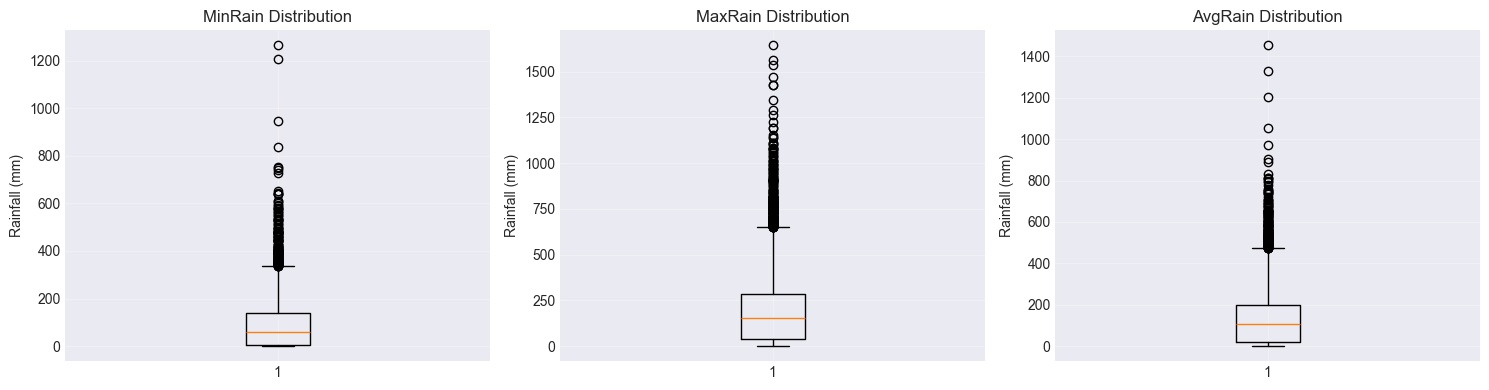

✓ Boxplot visualization created


In [16]:
# สร้าง visualization สำหรับ outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(rainfall_columns):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_ylabel('Rainfall (mm)')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Boxplot visualization created")

## 8. Additional Data Quality Checks
ตรวจสอบคุณภาพข้อมูลเพิ่มเติม

In [17]:
# ตรวจสอบความสมเหตุสมผลของข้อมูล
print("=== Data Quality Checks ===\n")

# 1. ตรวจสอบค่าติดลบ
print("1. Checking for negative rainfall values:")
for col in rainfall_columns:
    negative_count = (df[col] < 0).sum()
    print(f"   {col}: {negative_count} negative values")

# 2. ตรวจสอบความสัมพันธ์ระหว่าง Min, Avg, Max
print("\n2. Checking rainfall relationship (Min ≤ Avg ≤ Max):")
inconsistent = df[(df['MinRain'] > df['AvgRain']) | (df['AvgRain'] > df['MaxRain'])]
print(f"   Inconsistent rows: {len(inconsistent)}")

# 3. ตรวจสอบช่วงปี
print(f"\n3. Year range: {df['YEAR'].min():.0f} - {df['YEAR'].max():.0f}")

# 4. ตรวจสอบจำนวนจังหวัด
print(f"\n4. Number of unique provinces: {df['PROV_T'].nunique()}")

# 5. ตรวจสอบจำนวน records ต่อจังหวัด
print(f"\n5. Records per province:")
province_counts = df.groupby('PROV_T').size().describe()
print(province_counts)

print("\n✓ Data quality checks completed")

=== Data Quality Checks ===

1. Checking for negative rainfall values:
   MinRain: 0 negative values
   MaxRain: 0 negative values
   AvgRain: 0 negative values

2. Checking rainfall relationship (Min ≤ Avg ≤ Max):
   Inconsistent rows: 0

3. Year range: 2018 - 2025

4. Number of unique provinces: 77

5. Records per province:
count    77.0
mean     93.0
std       0.0
min      93.0
25%      93.0
50%      93.0
75%      93.0
max      93.0
dtype: float64

✓ Data quality checks completed


## 9. Final Data Summary
สรุปข้อมูลหลังจากทำความสะอาด

In [18]:
# สรุปข้อมูลหลังการทำความสะอาด
print("="*60)
print("CLEANED DATA SUMMARY")
print("="*60)

print(f"\nOriginal shape: {df_original.shape}")
print(f"Cleaned shape: {df.shape}")
print(f"Rows removed: {df_original.shape[0] - df.shape[0]}")

print(f"\n--- Column Information ---")
print(df.dtypes)

print(f"\n--- Sample of Cleaned Data ---")
print(df.head(10))

print(f"\n--- Missing Values After Cleaning ---")
print(df.isnull().sum())

print(f"\n--- Memory Usage ---")
print(f"Total memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*60)
print("✓ Data cleaning process completed successfully!")
print("="*60)

CLEANED DATA SUMMARY

Original shape: (7161, 7)
Cleaned shape: (7161, 8)
Rows removed: 0

--- Column Information ---
YEAR                int64
MONTH               int64
PROV_ID             int64
PROV_T             object
MinRain           float64
MaxRain           float64
AvgRain           float64
DATE       datetime64[ns]
dtype: object

--- Sample of Cleaned Data ---
   YEAR  MONTH  PROV_ID           PROV_T  MinRain  MaxRain  AvgRain       DATE
0  2018      1       10    กรุงเทพมหานคร    54.30   257.23   142.12 2018-01-01
1  2018      1       11      สมุทรปราการ    76.25   256.10   137.30 2018-01-01
2  2018      1       12          นนทบุรี    38.36   161.47   113.43 2018-01-01
3  2018      1       13         ปทุมธานี    51.44   116.50    82.90 2018-01-01
4  2018      1       14  พระนครศรีอยุธยา     8.85    88.59    39.96 2018-01-01
5  2018      1       15          อ่างทอง     4.39    33.94    20.63 2018-01-01
6  2018      1       16           ลพบุรี     6.52    99.49    49.09 2018-01-

## 10. Export Cleaned Data
ส่งออกข้อมูลที่ทำความสะอาดแล้วเพื่อนำไปใช้กับ Looker Studio

In [19]:
# จัดเรียงคอลัมน์ให้เหมาะสมสำหรับ Looker Studio
columns_order = ['DATE', 'YEAR', 'MONTH', 'PROV_ID', 'PROV_T', 'MinRain', 'MaxRain', 'AvgRain']
df_export = df[columns_order].copy()

# เรียงข้อมูลตามวันที่และจังหวัด
df_export = df_export.sort_values(['DATE', 'PROV_ID'])

# Reset index
df_export = df_export.reset_index(drop=True)

print("=== Export Preview ===")
print(df_export.head(10))
print(f"\nTotal rows to export: {len(df_export):,}")

=== Export Preview ===
        DATE  YEAR  MONTH  PROV_ID           PROV_T  MinRain  MaxRain  AvgRain
0 2018-01-01  2018      1       10    กรุงเทพมหานคร    54.30   257.23   142.12
1 2018-01-01  2018      1       11      สมุทรปราการ    76.25   256.10   137.30
2 2018-01-01  2018      1       12          นนทบุรี    38.36   161.47   113.43
3 2018-01-01  2018      1       13         ปทุมธานี    51.44   116.50    82.90
4 2018-01-01  2018      1       14  พระนครศรีอยุธยา     8.85    88.59    39.96
5 2018-01-01  2018      1       15          อ่างทอง     4.39    33.94    20.63
6 2018-01-01  2018      1       16           ลพบุรี     6.52    99.49    49.09
7 2018-01-01  2018      1       17        สิงห์บุรี     4.00    35.64    17.03
8 2018-01-01  2018      1       18           ชัยนาท     0.10    12.83     6.31
9 2018-01-01  2018      1       19          สระบุรี    23.85    73.07    47.69

Total rows to export: 7,161


In [20]:
# ส่งออกเป็นไฟล์ CSV สำหรับ Looker Studio
output_file = 'output/spatial-rain-hii-cleaned.csv'

try:
    df_export.to_csv(output_file, index=False, encoding='utf-8-sig')
    print(f"✓ Data exported successfully!")
    print(f"File location: {output_file}")
    print(f"\nFile size: {pd.read_csv(output_file).memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"\nYou can now upload this file to Looker Studio for visualization.")
except Exception as e:
    print(f"Error exporting data: {e}")

✓ Data exported successfully!
File location: output/spatial-rain-hii-cleaned.csv

File size: 1.29 MB

You can now upload this file to Looker Studio for visualization.


## 11. Data Visualization Preview
แสดงภาพรวมข้อมูลก่อนนำไปใช้งาน

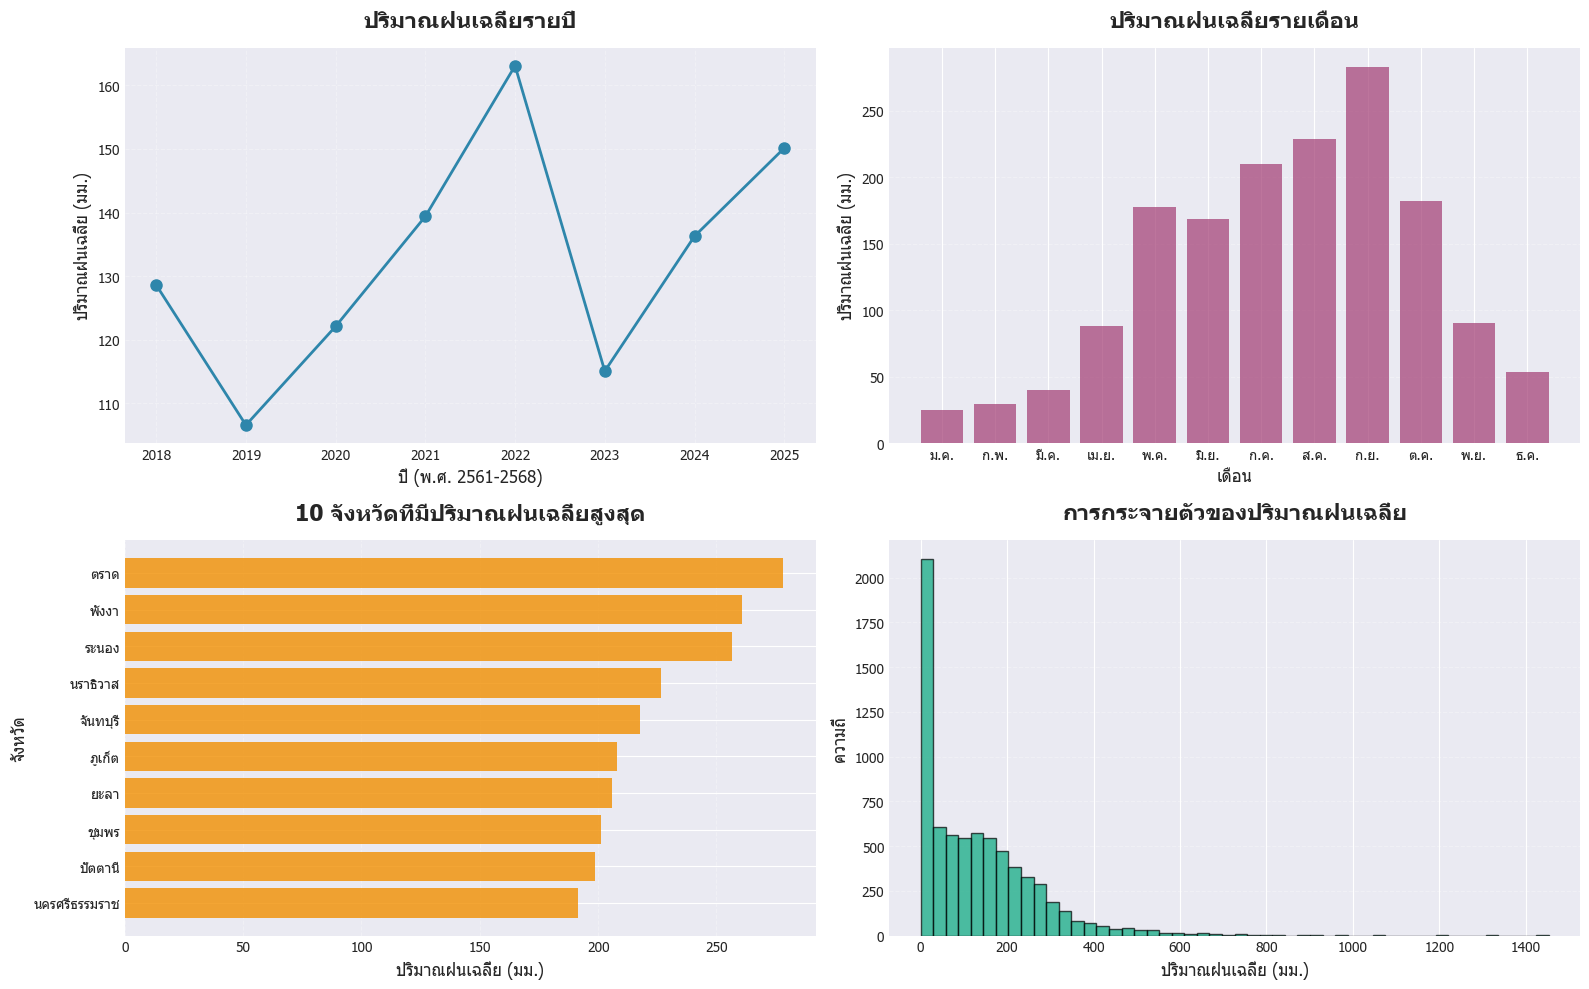

✓ สร้าง Visualization เรียบร้อยแล้ว (รองรับภาษาไทย)


In [22]:
# สร้าง visualization เพื่อดูภาพรวมข้อมูล

# ตั้งค่า font สำหรับภาษาไทย
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'Arial Unicode MS', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False  # แก้ปัญหาเครื่องหมายลบ

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Average rainfall by year
yearly_avg = df_export.groupby('YEAR')['AvgRain'].mean()
axes[0, 0].plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2, markersize=8, color='#2E86AB')
axes[0, 0].set_title('ปริมาณฝนเฉลี่ยรายปี', fontsize=16, fontweight='bold', pad=15)
axes[0, 0].set_xlabel('ปี (พ.ศ. ' + str(int(yearly_avg.index.min() + 543)) + '-' + str(int(yearly_avg.index.max() + 543)) + ')', fontsize=12)
axes[0, 0].set_ylabel('ปริมาณฝนเฉลี่ย (มม.)', fontsize=12)
axes[0, 0].grid(True, alpha=0.3, linestyle='--')

# 2. Average rainfall by month
monthly_avg = df_export.groupby('MONTH')['AvgRain'].mean()
month_names = ['ม.ค.', 'ก.พ.', 'มี.ค.', 'เม.ย.', 'พ.ค.', 'มิ.ย.', 'ก.ค.', 'ส.ค.', 'ก.ย.', 'ต.ค.', 'พ.ย.', 'ธ.ค.']
axes[0, 1].bar(range(len(monthly_avg)), monthly_avg.values, color='#A23B72', alpha=0.7)
axes[0, 1].set_title('ปริมาณฝนเฉลี่ยรายเดือน', fontsize=16, fontweight='bold', pad=15)
axes[0, 1].set_xlabel('เดือน', fontsize=12)
axes[0, 1].set_ylabel('ปริมาณฝนเฉลี่ย (มม.)', fontsize=12)
axes[0, 1].set_xticks(range(len(month_names)))
axes[0, 1].set_xticklabels(month_names, fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis='y', linestyle='--')

# 3. Top 10 provinces by average rainfall
province_avg = df_export.groupby('PROV_T')['AvgRain'].mean().sort_values(ascending=False).head(10)
axes[1, 0].barh(province_avg.index, province_avg.values, color='#F18F01', alpha=0.8)
axes[1, 0].set_title('10 จังหวัดที่มีปริมาณฝนเฉลี่ยสูงสุด', fontsize=16, fontweight='bold', pad=15)
axes[1, 0].set_xlabel('ปริมาณฝนเฉลี่ย (มม.)', fontsize=12)
axes[1, 0].set_ylabel('จังหวัด', fontsize=12)
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x', linestyle='--')

# 4. Distribution of average rainfall
axes[1, 1].hist(df_export['AvgRain'], bins=50, color='#06A77D', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('การกระจายตัวของปริมาณฝนเฉลี่ย', fontsize=16, fontweight='bold', pad=15)
axes[1, 1].set_xlabel('ปริมาณฝนเฉลี่ย (มม.)', fontsize=12)
axes[1, 1].set_ylabel('ความถี่', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()

print("✓ สร้าง Visualization เรียบร้อยแล้ว (รองรับภาษาไทย)")

## 🎯 Summary & Next Steps

### สิ่งที่ทำในกระบวนการทำความสะอาดข้อมูล:
1. ✅ โหลดข้อมูลจากไฟล์ CSV
2. ✅ ตรวจสอบโครงสร้างและสถิติของข้อมูล
3. ✅ จัดการค่าที่หายไป (Missing values)
4. ✅ ตรวจสอบและลบข้อมูลซ้ำ
5. ✅ แปลงประเภทข้อมูลให้ถูกต้อง
6. ✅ สร้างคอลัมน์ DATE สำหรับ time series analysis
7. ✅ ตรวจสอบ outliers และคุณภาพข้อมูล
8. ✅ ส่งออกข้อมูลที่สะอาดแล้ว

### ไฟล์ที่ได้:
- **Input**: `datasets/spatial-rain-hii.csv`
- **Output**: `output/spatial-rain-hii-cleaned.csv`

### คอลัมน์ในไฟล์ที่ส่งออก:
- `DATE`: วันที่ (format: YYYY-MM-DD)
- `YEAR`: ปี
- `MONTH`: เดือน (1-12)
- `PROV_ID`: รหัสจังหวัด
- `PROV_T`: ชื่อจังหวัด (ภาษาไทย)
- `MinRain`: ปริมาณฝนต่ำสุด (มม.)
- `MaxRain`: ปริมาณฝนสูงสุด (มม.)
- `AvgRain`: ปริมาณฝนเฉลี่ย (มม.)

### 📊 Next Steps สำหรับ Looker Studio:
1. Upload ไฟล์ `spatial-rain-hii-cleaned.csv` ไปยัง Google Drive
2. เชื่อมต่อ data source ใน Looker Studio
3. สร้าง visualization ต่างๆ เช่น:
   - Time series chart แสดงแนวโน้มฝนตามเวลา
   - Map visualization แสดงปริมาณฝนตามจังหวัด
   - Bar chart เปรียบเทียบฝนระหว่างจังหวัด
   - Heat map แสดงฝนตามเดือนและปี

### 💡 Tips:
- ใช้คอลัมน์ `DATE` เป็น dimension หลักสำหรับ time series
- ใช้ `PROV_T` สำหรับแสดงชื่อจังหวัดในภาษาไทย
- ใช้ `AvgRain` เป็น metric หลัก และ `MinRain`, `MaxRain` เป็น metric เสริม